In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
#veri setini okuyalım
data = pd.read_csv("veriler.csv")

In [13]:
#veri setimizin içindeki sütunlar
print(data.columns)

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')


In [14]:
#min-max normalizasyonu hesaplayacağız
min_max_normalized_veri = (data - data.min()) / (data.max() - data.min())

In [15]:
# Normalizasyon uygulanan veriyi göster
print(min_max_normalized_veri)

     Number of times pregnant  \
0                    0.352941   
1                    0.058824   
2                    0.470588   
3                    0.058824   
4                    0.000000   
..                        ...   
763                  0.588235   
764                  0.117647   
765                  0.294118   
766                  0.058824   
767                  0.058824   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                             0.743719                          
1                                             0.427136                          
2                                             0.919598                          
3                                             0.447236                          
4                                             0.688442                          
..                                                 ...                          
763                                 

2.soru 2.	Veri setine PCA ve LDA algoritmalarını uygulayarak en yüksek değere sahip iki öz değer için boyut indirgeme işlemini gerçekleştiriniz. PCA ve LDA için hangi özniteliklerin en ayırt edici olduğunu raporlayınız. Alt maddelerde verilen yöntemleri ana veri setine ve PCA uygulanmış transformasyon öznitelik matrisine uygulayınız.

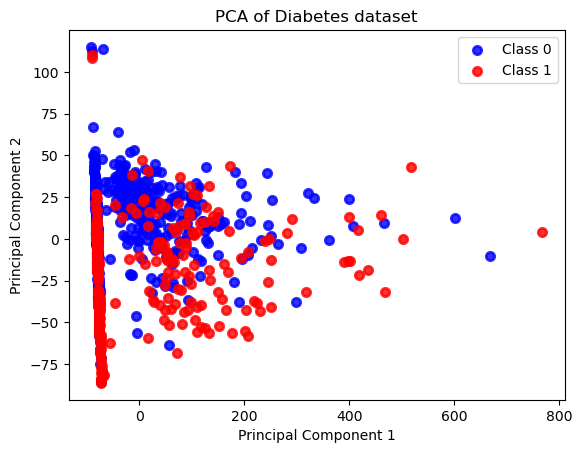

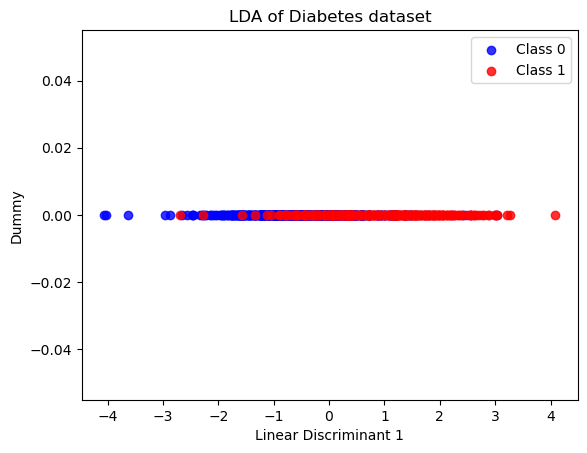

In [16]:
# Bağımsız değişkenlerin ve hedef değişkenin ayarlanması
X = data.drop(columns=['Class variable (0 or 1)'])  # Hedef değişken dışındaki sütunlar
y = data['Class variable (0 or 1)']  # Hedef değişken

# PCA uygulama
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)


# LDA uygulama
lda = LinearDiscriminantAnalysis(n_components=1)  # Sadece bir bileşen oluştur
X_r2 = lda.fit(X, y).transform(X)


# PCA ve LDA sonuçlarını görselleştirme
plt.figure()
colors = ['blue', 'red']  # Sınıflar için renkler
lw = 2  # Çizgi kalınlığı

# PCA görselleştirme
for color, i, target_name in zip(colors, [0, 1], ['Class 0', 'Class 1']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Diabetes dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# LDA görselleştirme
plt.figure()
for color, i, target_name in zip(colors, [0, 1], ['Class 0', 'Class 1']):
    plt.scatter(X_r2[y == i], [0] * np.sum(y == i), alpha=0.8, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Diabetes dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Dummy')
plt.show()

3. SORU :  
Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyon analizi yöntemlerini uygulayınız. Elde ettiğiniz katsayıları raporlayınız.  Elde ettiğiniz regresyon denklemlerini kullanarak Test kümesi için performans metriklerini hesaplayınız.

In [17]:
# Bağımsız değişkenler ve hedef değişkeni ayırın
X = data.drop(columns=['Class variable (0 or 1)'])
y = data['Class variable (0 or 1)']

# Veriyi eğitim ve test setlerine ayırın
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon analizi uygulayın
dogrusal_regresyon = LinearRegression()
dogrusal_regresyon.fit(X_egitim, y_egitim)

# Katsayıları raporlayın
print("Çoklu Doğrusal Regresyon Katsayıları:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {dogrusal_regresyon.coef_[i]}")

# Tahminleri yapın
y_tahmin_dogrusal_regresyon = dogrusal_regresyon.predict(X_test)

# Performans metriklerini hesaplayın
mse_dogrusal_regresyon = mean_squared_error(y_test, y_tahmin_dogrusal_regresyon)
print("Çoklu Doğrusal Regresyon MSE:", mse_dogrusal_regresyon)

# Multinominal Lojistik Regresyon analizi uygulayın
lojistik_regresyon = LogisticRegression(max_iter=1000)
lojistik_regresyon.fit(X_egitim, y_egitim)

# Katsayıları raporlayın
print("\nMultinominal Lojistik Regresyon Katsayıları:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {lojistik_regresyon.coef_[0][i]}")

# Tahminleri yapın
y_tahmin_lojistik_regresyon = lojistik_regresyon.predict(X_test)

# Performans metriklerini hesaplayın
accuracy_lojistik_regresyon = accuracy_score(y_test, y_tahmin_lojistik_regresyon)
print("Multinominal Lojistik Regresyon Doğruluk:", accuracy_lojistik_regresyon)

Çoklu Doğrusal Regresyon Katsayıları:
Number of times pregnant: 0.008993943574591191
Plasma glucose concentration a 2 hours in an oral glucose tolerance test: 0.005741608634515054
Diastolic blood pressure (mm Hg): -0.0017111446952379644
Triceps skinfold thickness (mm): -0.00025320834652632206
2-Hour serum insulin (mu U/ml): -0.00012649915169296277
Body mass index (weight in kg/(height in m)^2): 0.016173473593463387
Diabetes pedigree function: 0.0729016857787849
Age (years): 0.006264504815336458
Çoklu Doğrusal Regresyon MSE: 0.17603335005142035

Multinominal Lojistik Regresyon Katsayıları:
Number of times pregnant: 0.05778505520377742
Plasma glucose concentration a 2 hours in an oral glucose tolerance test: 0.035901644022680895
Diastolic blood pressure (mm Hg): -0.010869032371758984
Triceps skinfold thickness (mm): -0.0014096170793228226
2-Hour serum insulin (mu U/ml): -0.0009845585760721704
Body mass index (weight in kg/(height in m)^2): 0.10910452762287297
Diabetes pedigree function: 

4. SORU :  
Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Veri setinize karar ağaç sınıflandırma algoritmasını uygulayarak ağaç yapısını ve kestirim sonuçlarını veriniz. Test verisi için performans metriklerini hesaplayınız.

In [18]:
# Bağımsız değişkenler ve hedef değişkeni ayırın
X = data.drop(columns=['Class variable (0 or 1)'])
y = data['Class variable (0 or 1)']

# Veriyi eğitim ve test setlerine ayırın
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırma modelini oluşturun ve eğitin
karar_agaci = DecisionTreeClassifier()
karar_agaci.fit(X_egitim, y_egitim)

# Ağaç yapısını görselleştirin (opsiyonel, yalnızca matplotlib ile çalışır)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 140))  # Daha büyük bir figür oluşturun
plot_tree(karar_agaci, feature_names=X.columns, class_names=['0', '1'], filled=True, fontsize=50)  # Metin boyutunu artırın
plt.show()


# Test verisi üzerinde tahmin yapın
y_tahmin = karar_agaci.predict(X_test)

# Test verisi için performans metriklerini hesaplayın
dogruluk = accuracy_score(y_test, y_tahmin)
print("Doğruluk:", dogruluk)

rapor = classification_report(y_test, y_tahmin)
print("Sınıflandırma Raporu:\n", rapor)

matris = confusion_matrix(y_test, y_tahmin)
print("Confusion Matrix:\n", matris)

Doğruluk: 0.7186147186147186
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       151
           1       0.58      0.71      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.72      0.72       231

Confusion Matrix:
 [[109  42]
 [ 23  57]]


5.soru 5.	Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Naive bayes sınıflandırıcısını uygulayınız. Elde ettiğiniz sonucları raporlayınız.  Test verisi için performans metriklerini hesaplayınız.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Veri setini yükleme
dataset = pd.read_csv('veriler.csv')

# Sütun isimlerini güncelleme
dataset.columns = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'class']

# Bağımsız değişkenlerin ve hedef değişkenin belirlenmesi
X = dataset.drop('class', axis=1)
y = dataset['class']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gaussian Naive Bayes modelinin oluşturulması, eğitilmesi ve tahmin yapılması
model = GaussianNB()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Eğitim ve test verileri için sınıflandırma raporlarının oluşturulması
train_classification_report = metrics.classification_report(y_train, train_predictions)
test_classification_report = metrics.classification_report(y_test, test_predictions)

# Test verisi için karışıklık matrisinin oluşturulması
confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)

# Sonuçların yazdırılması
print("Eğitim Verisi Sınıflandırma Raporu:")
print(train_classification_report)
print("\nTest Verisi Sınıflandırma Raporu:")
print(test_classification_report)
print("\nTest Verisi Karışıklık Matrisi:")
print(confusion_matrix)


Eğitim Verisi Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       349
           1       0.70      0.59      0.64       188

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.73       537
weighted avg       0.76      0.77      0.76       537


Test Verisi Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231


Test Verisi Karışıklık Matrisi:
[[119  32]
 [ 27  53]]


Roc Egrisi

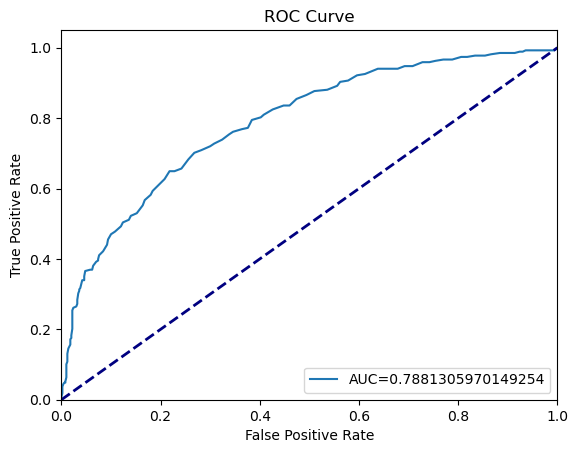

In [20]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Örnek veri seti yükleme ve sütunları yeniden adlandırma
dataset = pd.read_csv('veriler.csv')
dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']

# Tahmin edilen olasılıklar ve gerçek sınıflar
test = dataset['class']
doc = dataset['glucose']

# ROC eğrisi hesaplama
fpr, tpr, thresholds = metrics.roc_curve(test, doc)
auc = metrics.roc_auc_score(test, doc)

# ROC eğrisi çizimi
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')

# ROC eğrisi çizimi için ekstra detaylar
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()